In [4]:
import pandas as pd
import matplotlib.pyplot as plt

dec6 = pd.read_csv("datasets/coinmarketcap_06122017.csv")

# selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id', 'market_cap_usd']]

market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [5]:
market_cap_raw

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
...,...,...
1321,turbocoin,NaN
1322,birds,NaN
1323,bitcoincashscrypt,NaN
1324,swisscoin,NaN


In [9]:
cap = market_cap_raw.query('market_cap_usd>0')
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

Text(0, 0.5, '% of total cap')

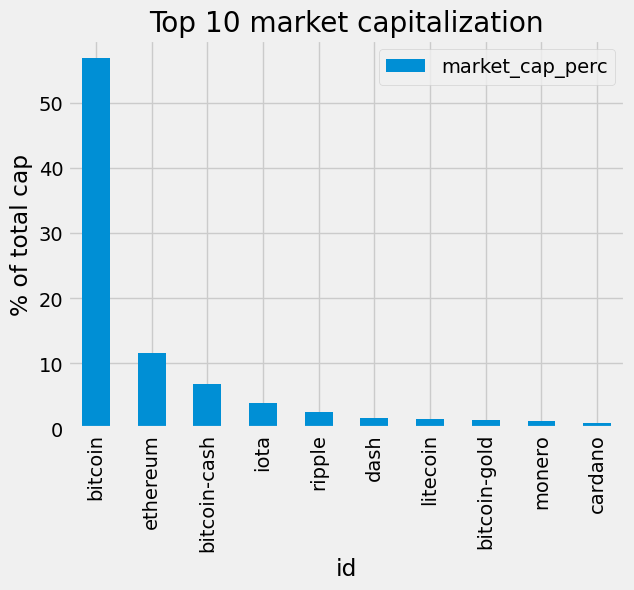

In [13]:
# Declearing these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap.head(10).set_index(cap.id[:10])

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum())*100)

# Plotting the barplot with the title defined above
ax = cap10.plot.bar(x='id', y='market_cap_perc', title=TOP_CAP_TITLE)

# Annotating the y-axis with the label defined above
ax.set_ylabel(TOP_CAP_YLABEL)

Text(0.5, 0, '')

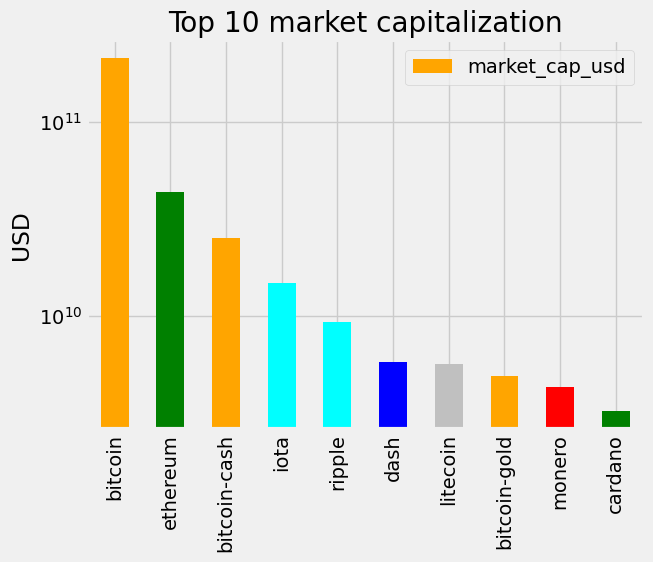

In [22]:
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']


# Plotting market_cap_usd as before but adding the colors and scaling the y-axis
ax = cap10.plot.bar(x='id', y='market_cap_usd', logy=True, color=COLORS, title=TOP_CAP_TITLE)

# Annotating the y-axis with 'USD'
ax.set_ylabel('USD')
ax.set_xlabel('')

In [25]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

# Setting the index to 'id', and dropping all NaN rows
valatility = volatility.set_index('id').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h', ascending=True)

# Checking the first few rows
volatility.head()

,id,percent_change_24h,percent_change_7d
1246,flappycoin,-95.85,-96.61
613,credence-coin,-94.22,-95.31
1177,coupecoin,-93.93,-61.24
1319,tyrocoin,-79.02,-87.43
498,petrodollar,-76.55,542.96


In [29]:
# Defining a dunction with 2 parameters, the series to plot and title
def top10_subplot(volatility_series, title):
    # Making the subplot and figure for 2 sides by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

    # Plotting with pandas the barchart for the top10 losers
    ax = (volatility_series[:10].plot.bar(color='darkred', ax=axes[0]))

    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    ax.set_ylabel('% change')
    ax = (volatility_series[-10:].plot.bar(color='darkblue', ax=axes[1]))

    # Returning this for good practice, might use later
    return fig, ax

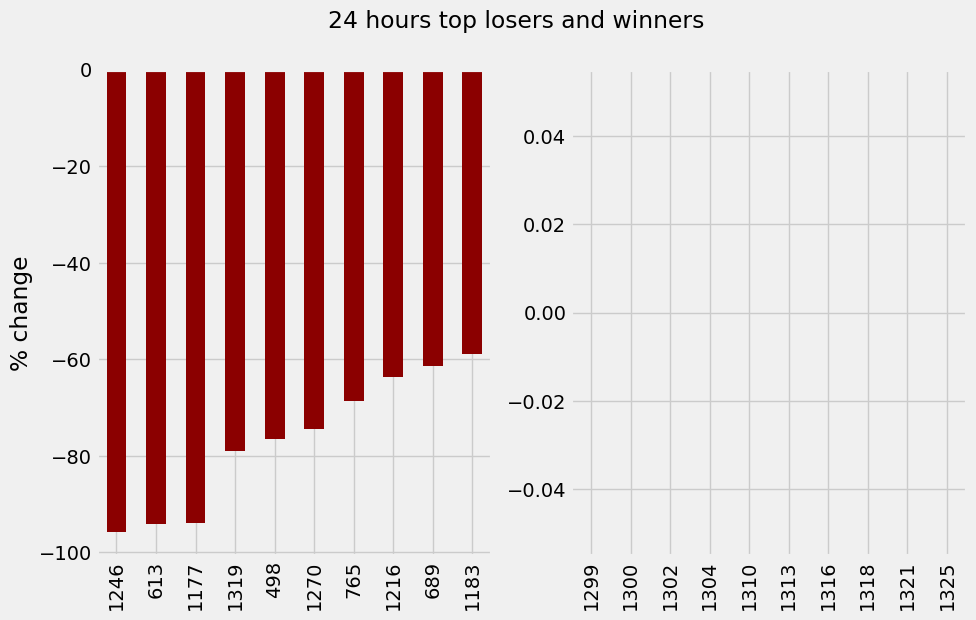

In [30]:
DTITLE = '24 hours top losers and winners'

# Calling the function above with the 24 hours period series and title DTITLE
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

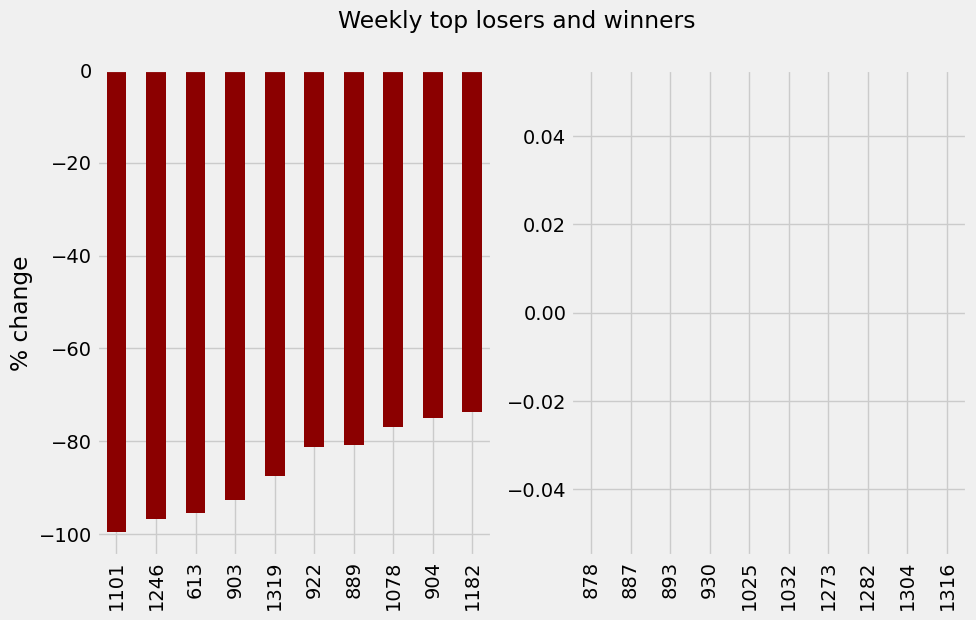

In [31]:
# Sorting in ascending order
volatility7d = volatility.sort_values('percent_change_7d', ascending=True)

WTITLE = 'Weekly top losers and winners'

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

In [32]:
# Selecting everything bigger than 10 billion
largecaps = cap.query('market_cap_usd > 10000000000')

# Printing out largecaps
largecaps

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


<BarContainer object of 3 artists>

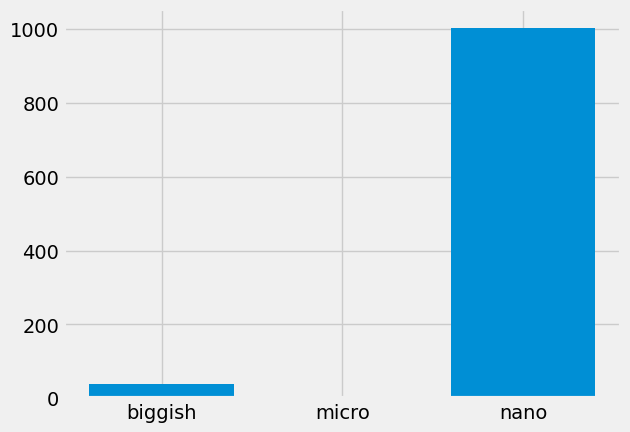

In [34]:
def capcount(query_string):
    return cap.query(query_string).count().id

# labels for the plot
LABELS = ['biggish', 'micro', 'nano']

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd > 300000000')

micro = capcount('market_cap_usd > 500000000 & market_cap_usd < 300000000')

nano = capcount('market_cap_usd < 500000000')

values = (biggish, micro, nano)

plt.bar(range(len(values)), values, tick_label=LABELS)